<a href="https://colab.research.google.com/github/Tlegenov-Kh/hw3-ai/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#U1910040 Khudaybergen Tlegenov

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


### import libraries

In [40]:
#import libraries needed
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model,preprocessing,tree,model_selection,svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import plot_tree

### digest source datasets

In [41]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_subeg = pd.read_csv("gender_submission.csv")

dfs = [df_train,df_test]

df_train.name = 'df_train'
df_test.name = 'df_test'

### explore datasets

In [42]:
print("*"*40+" Train DataFrame "+"*"*40)
df_train.info()
print("\n"+"*"*40+" Test DataFrame "+"*"*40)
df_test.info()


**************************************** Train DataFrame ****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

**************************************** Test DataFrame ****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex

In [43]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Check NaN

In [45]:
for df in dfs:
    print('*'*60)    
    print(df.name)
    print('*'*60)    
    for col in df.columns:
        print(col+":", df.loc[df[col].isna()|df[col].isnull(),col].shape[0])


************************************************************
df_train
************************************************************
PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2
************************************************************
df_test
************************************************************
PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Ticket: 0
Fare: 1
Cabin: 327
Embarked: 0


#### Survive Rate

0    0.616162
1    0.383838
Name: Survived, dtype: float64


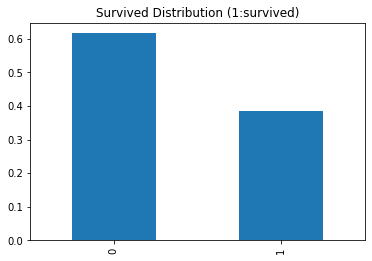

In [46]:
print (df_train.Survived.value_counts(normalize=True))
df_train.Survived.value_counts(normalize=True).plot(kind="bar")
plt.title("Survived Distribution (1:survived)")
plt.show()

#### Survive on Gender

male      0.647587
female    0.352413
Name: Sex, dtype: float64


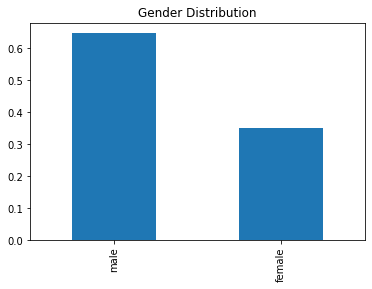

In [47]:
print (df_train.Sex.value_counts(normalize=True))
df_train.Sex.value_counts(normalize=True).plot(kind="bar")
plt.title("Gender Distribution")
plt.show()

#### Survive on Age

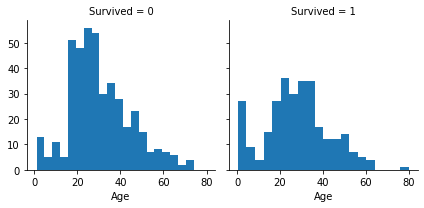

In [48]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

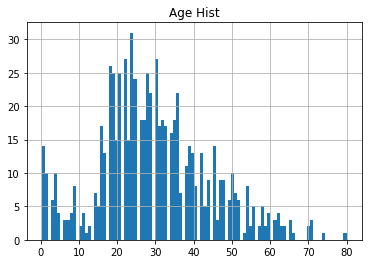

In [49]:
df_train["Age"].hist(bins=100)
plt.title("Age Hist")
plt.show()

In [50]:
df_train['AgeBand'] = pd.cut(df_train['Age'], 8)
df_train[['AgeBand', 'Survived']].groupby(
    ['AgeBand']
    , as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 10.368]",0.593750
1,"(10.368, 20.315]",0.382609
2,"(20.315, 30.263]",0.365217
3,"(30.263, 40.21]",0.445161
4,"(40.21, 50.158]",0.383721
5,"(50.158, 60.105]",0.404762
6,"(60.105, 70.052]",0.235294
7,"(70.052, 80.0]",0.200000


In [51]:
df_train.drop(columns='AgeBand',inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


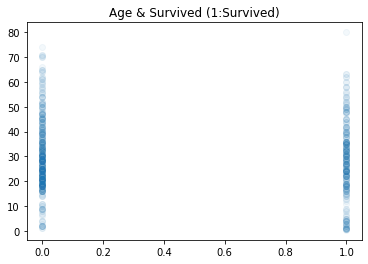

In [52]:
plt.scatter(df_train.Survived,df_train.Age,alpha=0.05)
plt.title("Age & Survived (1:Survived)")
plt.show()

#### Survive on Embarked

In [53]:
df_train.Embarked[df_train.Embarked.isna()]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [54]:
print(df_train.Embarked.value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64


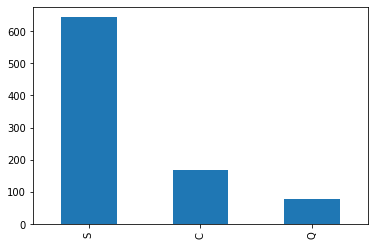

In [55]:
print(df_train.Embarked.value_counts(normalize=True))
df_train.Embarked.value_counts(normalize=False).plot(kind="bar")
plt.show()

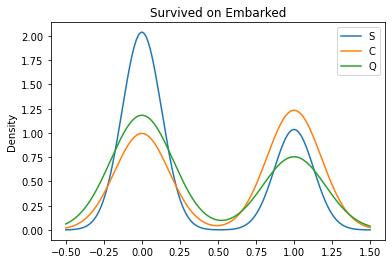

In [56]:
for x in ('S','C','Q'):
    df_train.Survived[df_train.Embarked==x].plot(kind="kde")
    
plt.title("Survived on Embarked")
plt.legend(('S','C','Q'))
plt.show()

#### Survive on Pclass

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


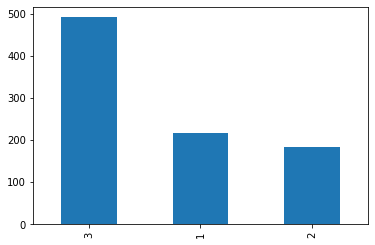

In [57]:
print(df_train.Pclass.value_counts(normalize=True))
df_train.Pclass.value_counts(normalize=False).plot(kind="bar")
plt.show()

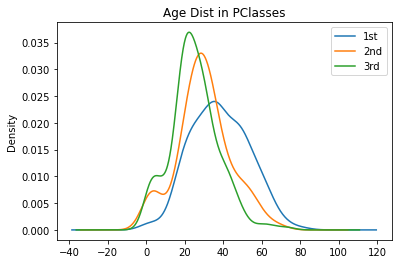

In [58]:
for x in (1,2,3):
    df_train.Age[df_train.Pclass==x].plot(kind="kde")
    
plt.title("Age Dist in PClasses")
plt.legend(("1st","2nd","3rd"))
plt.show()

female    0.681287
male      0.318713
Name: Sex, dtype: float64


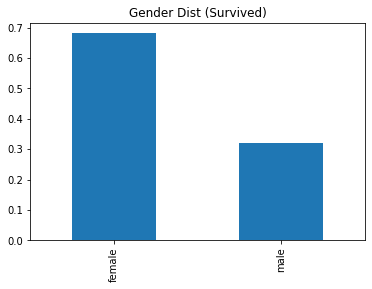

In [59]:
print(df_train.Sex[df_train.Survived==1].value_counts(normalize=True))
df_train.Sex[df_train.Survived==1].value_counts(normalize=True).plot(kind="bar")
plt.title("Gender Dist (Survived)")
plt.show()

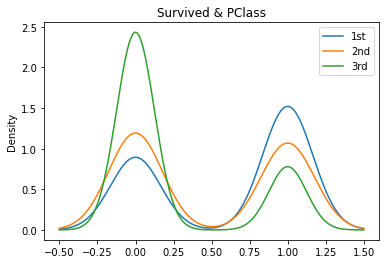

In [60]:
for x in (1,2,3):
    df_train.Survived[df_train.Pclass==x].plot(kind="kde")
    
plt.title("Survived & PClass")
plt.legend(("1st","2nd","3rd"))
plt.show()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


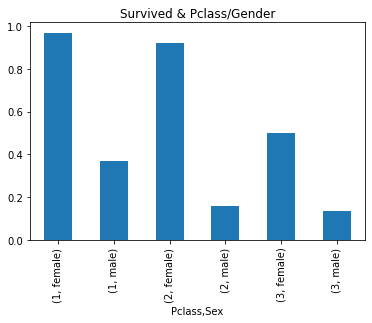

In [61]:
print(df_train.groupby(["Pclass","Sex"]).Survived.mean())
df_train.groupby(["Pclass","Sex"]).Survived.mean().plot(kind="bar")
plt.title("Survived & Pclass/Gender")
plt.show()

### transform some columns

In [62]:
df_train.Embarked.combine_first(df_test.Embarked).value_counts()


S    645
C    168
Q     77
Name: Embarked, dtype: int64

In [63]:
print(df_train.groupby(by="Pclass")['Fare'].mean())
print(df_test.groupby(by="Pclass")['Fare'].mean())
df_test.loc[df_test['Fare'].isna(),'Pclass']

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64
Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64


152    3
Name: Pclass, dtype: int64

In [64]:
filler_age = df_train.Age.combine_first(df_test.Age).dropna().median()

for df in dfs:
    df.Sex = df.Sex.map({"male":0,"female":1,0:0,1:1})
    df.Embarked = df.Embarked.fillna("S")
    df.Embarked = df.Embarked.map({"S":0,"C":1,"Q":2,0:0,1:1,2:2})
    df.Fare = df.Fare.fillna(13)
    
    df.Age = df.Age.fillna(filler_age).astype(np.integer)
    df.drop(columns=['Cabin'],inplace=True,errors='ignore')
    

In [65]:
for dataset in dfs:    
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 70), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 70) & (dataset['Age'] <= 80), 'Age'] = 7
    dataset.loc[ dataset['Age'] > 80, 'Age'] = 8
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,3,0,0,373450,8.0500,0


### Machine Learning Modeling


#### features and label

In [66]:
features_list = ["Pclass","Age","Fare","Sex","SibSp","Parch","Embarked"]
training_target = df_train.Survived.values
training_features = df_train[features_list].values

display(training_features)

array([[ 3.    ,  2.    ,  7.25  , ...,  1.    ,  0.    ,  0.    ],
       [ 1.    ,  3.    , 71.2833, ...,  1.    ,  0.    ,  1.    ],
       [ 3.    ,  2.    ,  7.925 , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 3.    ,  2.    , 23.45  , ...,  1.    ,  2.    ,  0.    ],
       [ 1.    ,  2.    , 30.    , ...,  0.    ,  0.    ,  1.    ],
       [ 3.    ,  3.    ,  7.75  , ...,  0.    ,  0.    ,  2.    ]])

#### linear regression 

In [67]:
ML = linear_model.LogisticRegression(solver='lbfgs',max_iter=100)
ln_model = ML.fit(training_features,training_target)

print("Linear Model Score", ln_model.score(training_features,training_target))

Linear Model Score 0.7968574635241302


#### decision trees

In [68]:
ML = tree.DecisionTreeClassifier(random_state=1,max_depth=3,min_samples_split=4)
model = ML.fit(training_features,training_target)

print("Decision tree score:",model.score(training_features,training_target))

scores = model_selection.cross_val_score(ML,training_features,training_target,scoring="accuracy",cv=50)
scores.mean()

Decision tree score: 0.8305274971941639


0.8276470588235294

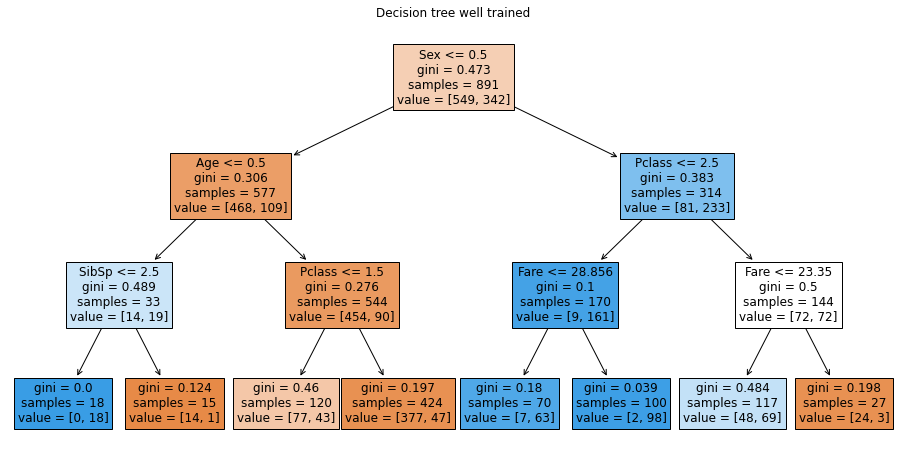

In [69]:

plt.figure(figsize=(16,8))
plot_tree(model, filled=True, fontsize=12,feature_names=features_list)
plt.title("Decision tree well trained")
plt.show()


### predict on test dataset with the trained model

In [70]:
predict = model.predict(df_test[features_list].values)
df_test['Survived'] = predict
df_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,3,0,0,330911,7.8292,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,4,1,0,363272,7.0000,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,6,0,0,240276,9.6875,2,0
3,895,3,"Wirz, Mr. Albert",0,2,0,0,315154,8.6625,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2,1,1,3101298,12.2875,0,1
5,897,3,"Svensson, Mr. Johan Cervin",0,1,0,0,7538,9.2250,0,0
6,898,3,"Connolly, Miss. Kate",1,2,0,0,330972,7.6292,2,1
7,899,2,"Caldwell, Mr. Albert Francis",0,2,1,1,248738,29.0000,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,1,0,0,2657,7.2292,1,1
9,901,3,"Davies, Mr. John Samuel",0,2,2,0,A/4 48871,24.1500,0,0


In [71]:
df_sub = df_test.loc[:,['PassengerId','Survived']]
df_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [72]:
df_sub.to_csv("my_submission.csv"
             ,header=True
             ,index=False)